# Step6: Portfolio Optimization Results - Data Analysis

---
**What does this notebook do?**
- After building up and running through all the portfolio optimization algorithms for all portfolios
- There are 4 periods x 4 prediction algortihms x 4 portfolio optimization algorithms = 64 reults
- This notebook breaks the 64 results apart for data visualization and analysis

**To-Do List**
1. Build up function to show the needed results for a given period
2. Build up function to visualize the data and compare different portfolio optimization algorithms performance

---

In [1]:
def show_period_results(period_time_results):
    """
    This function selects a certain period of the final portfolio results
    and displays the sharpe ratio, cumulative return increase percentage and HSI increase percentage
    also the weights for each portfolio
    """
    import pandas as pd
    df = pd.read_csv("../Results/PortfolioOptimization/portfolio_optimization_results_all_period_prediction.csv")
    result = df[df['time_period']==period_time_results][['prediction_model','portfolio_optimization_model',
                                                          'sharpe', 'cumulative_increase_percentage(%)', 
                                                          'HSI_increase_percentage(%)']]
    result = result.set_index(['prediction_model', 'portfolio_optimization_model'])
    
    df_weight = df[df['time_period']==period_time_results][['prediction_model','portfolio_optimization_model','model_weight']]
    df_weight = df_weight.set_index(['prediction_model', 'portfolio_optimization_model'])
    
    pd.set_option('display.max_colwidth', None)
    display(result.style.set_caption(f'{period_time_results}'))
    display(df_weight.style.set_caption(f'{period_time_results}'))
    
    return result



def plot_sharpe_cumu_percentage_figures(df, super_title):
    """
    This function plots the sharpe ratio and cumulative return increase percentage
    for each time period, to better visualize the difference among various
    portfolio optimization algorithms
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    pal = ["#29518A", "#29518A", "#29518A", "#29518A",
           "#F0D009", "#F0D009", "#F0D009", "#F0D009", 
           "#EA7B7B", "#EA7B7B", "#EA7B7B", "#EA7B7B", 
           "#228B22", "#228B22", "#228B22", "#228B22"]

    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))

    df['sharpe'].plot(ax = axes[0], kind='bar',subplots=True, color=pal)
    df['cumulative_increase_percentage(%)'].plot(ax = axes[1], kind='bar',subplots=True, color=pal)

    st = fig.suptitle(super_title, fontsize=25)
    
    plt.show()

## All Time Test Results

In [2]:
all_time_results = show_period_results("all_time_results")

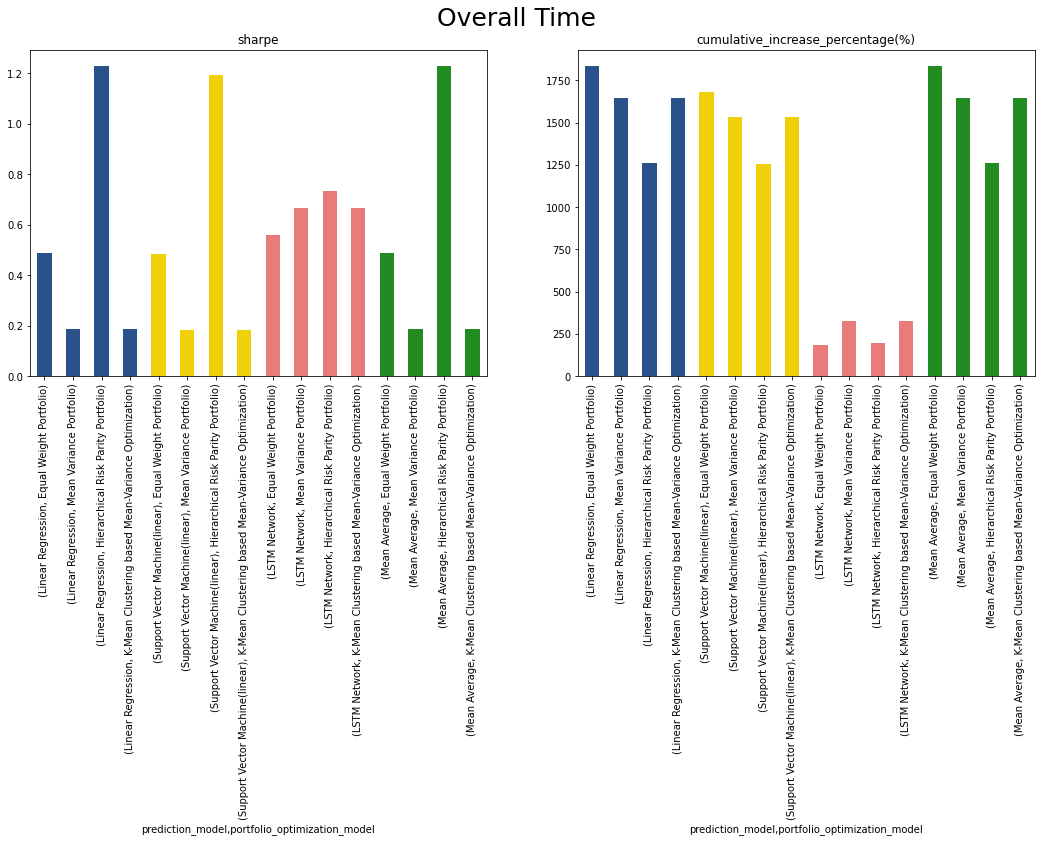

In [3]:
plot_sharpe_cumu_percentage_figures(all_time_results, 'Overall Time')

## Covid Time Test Results

In [4]:
covid_time_results = show_period_results("covid_time_results")

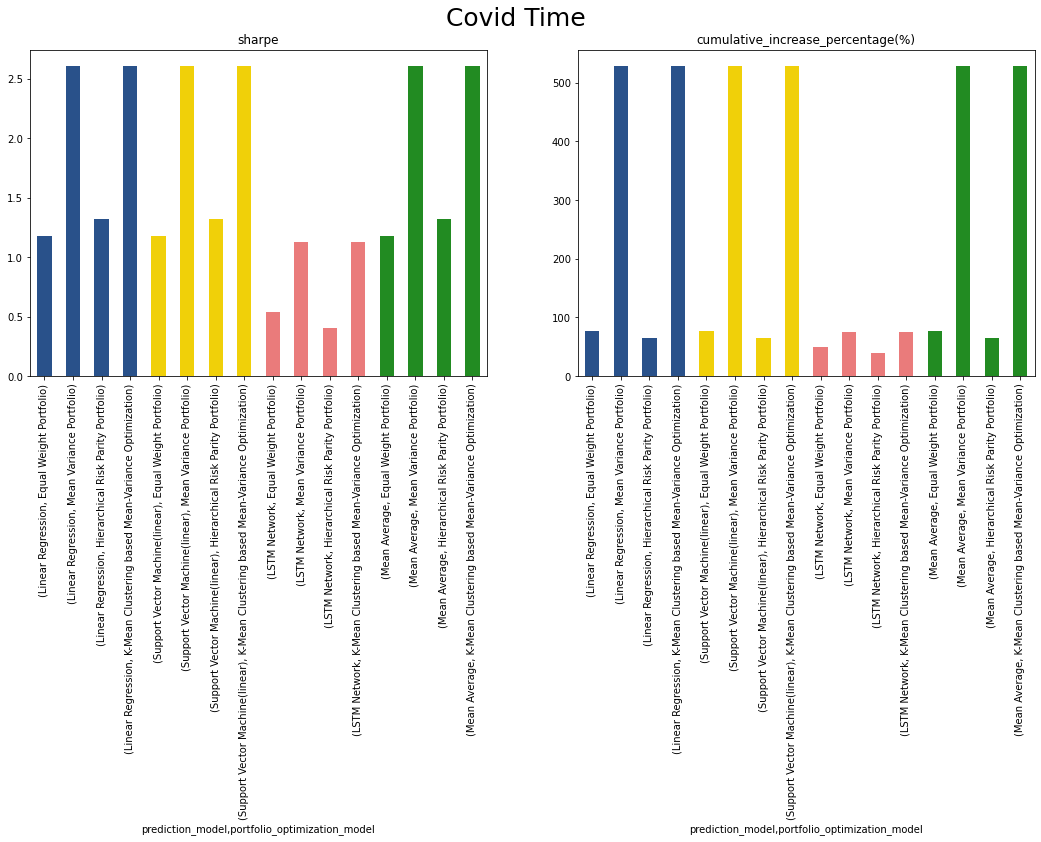

In [5]:
plot_sharpe_cumu_percentage_figures(covid_time_results, 'Covid Time')

## Pre Covid Time Results

In [6]:
pre_covid_results = show_period_results("pre_covid_time_results")

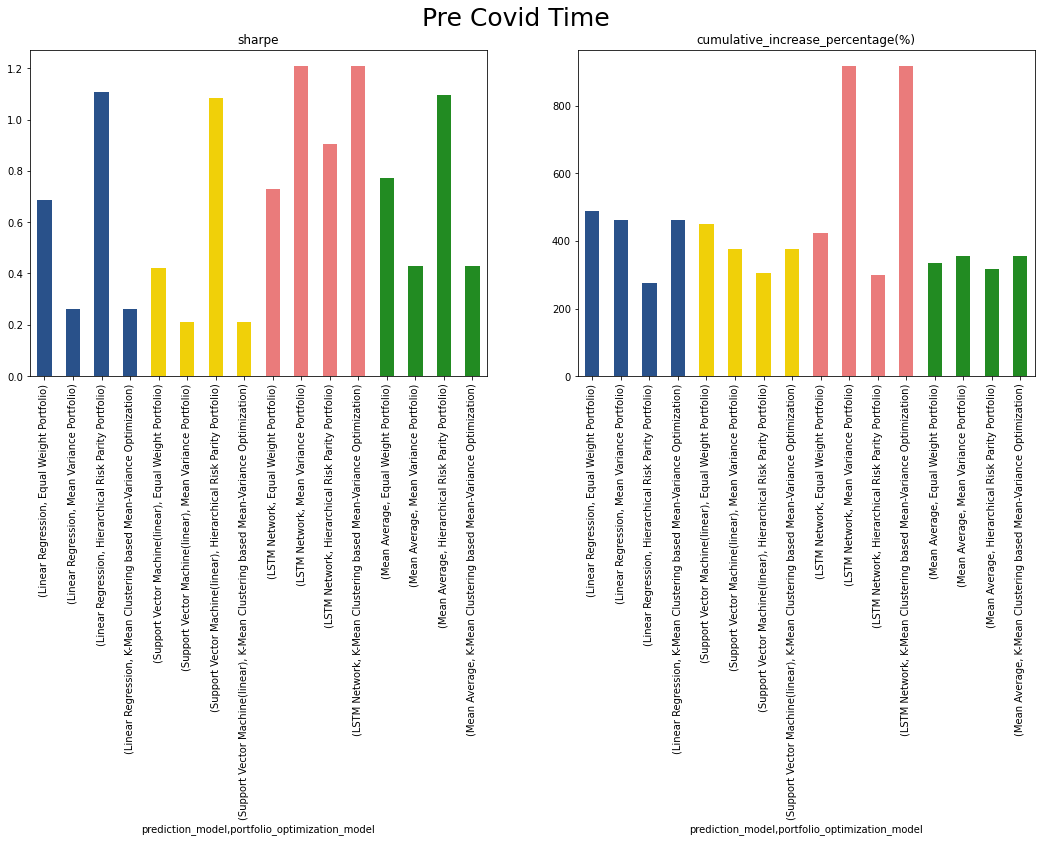

In [7]:
plot_sharpe_cumu_percentage_figures(pre_covid_results, 'Pre Covid Time')

## Pre Covid Test Time  Results

In [10]:
pre_covid_test_results = show_period_results("pre_covid_test_time_results")

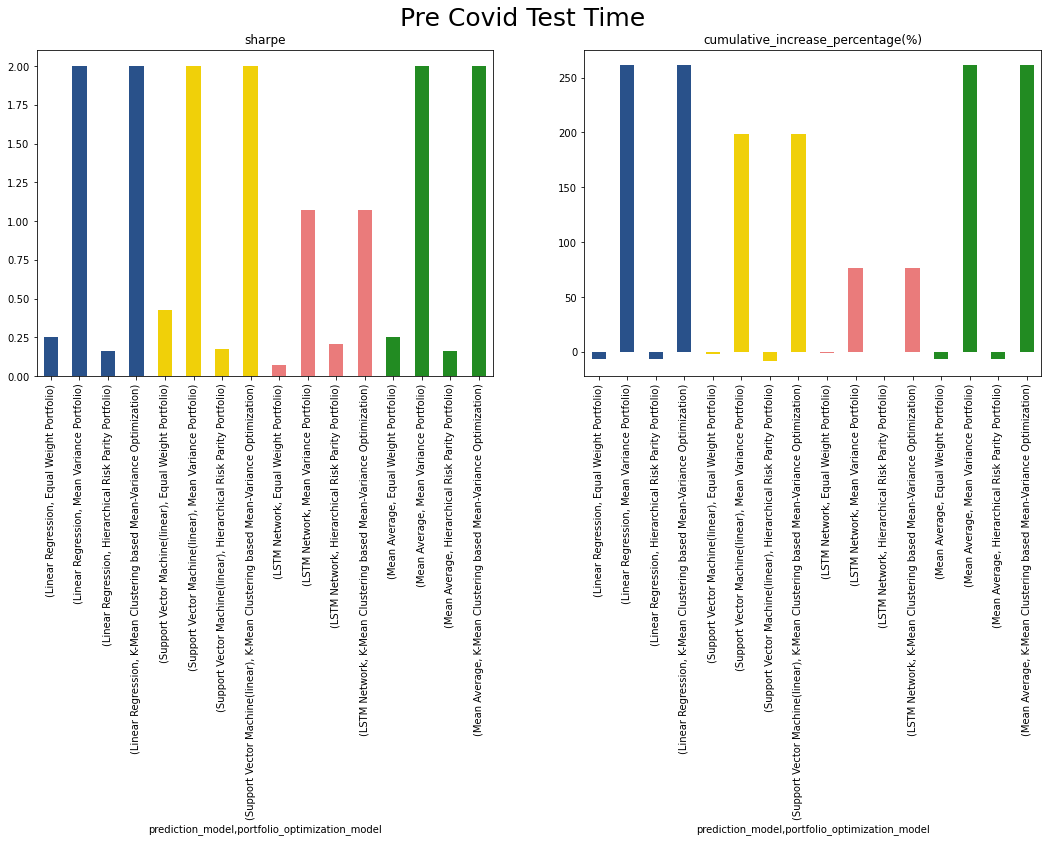

In [9]:
plot_sharpe_cumu_percentage_figures(pre_covid_test_results, 'Pre Covid Test Time')